Best Accurancy =0.9545281030981357
best parameters ={'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


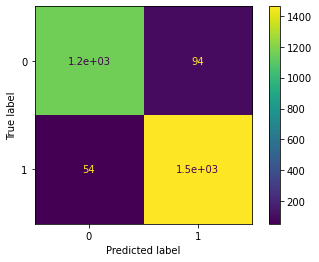

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

#importing the dataset
dataset = pd.read_csv("phishcoop.csv")
dataset = dataset.drop('id', 1) #removing unwanted column

x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 
#-------------------------------------------------------------------------

#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test, y_test)

#pickle file joblib
#joblib.dump(classifier, 'final_models/rf_final.pkl')


#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])



